### Data preprocessing Ver 1.0

This file will preprocess the "healthcare-dataset-stroke-data.csv" data.
The processed data are summarized in the last cell, which includes:
1. Unbalanced processed file with label encoding, filling in missing data with column mean, and dropping irrelevent feature
2. Balanced data using the SMOTE algorithm
3. Dimension reducued data (2D and 3D) using T-SNE and PCA


In [7]:
import pandas as pd
import sys
import matplotlib
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from tqdm import tqdm
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA

In [8]:
## You will need to change the path to where the "healthcare-dataset-stroke-data.csv" file is saved on your computer

rawData = pd.read_csv('/Users/tanyawen/Desktop/healthcare-dataset-stroke-data.csv')
print("The raw Data:")
print(rawData.head())
print("==============================================================================")
print('In the raw data, the target value and corrsponding number of data points are:')
print(rawData['stroke'].value_counts())

The raw Data:
      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  
In the raw data, the target value and corr

In [9]:
## Drop Patient ID feature
processed = rawData.drop(['id'], axis = 1)

## Label encoder:
label_encoder = preprocessing.LabelEncoder()

for feature in processed:
    if (processed[feature].dtype == object):
        processed[feature]= label_encoder.fit_transform(processed[feature])

## fill NaN data in BMI with colum average
meanBMI = processed['bmi'].mean()
processed['bmi'] = processed['bmi'].fillna(value=meanBMI)

print (processed.head())

   gender   age  hypertension  heart_disease  ever_married  work_type  \
0       1  67.0             0              1             1          2   
1       0  61.0             0              0             1          3   
2       1  80.0             0              1             1          2   
3       0  49.0             0              0             1          2   
4       0  79.0             1              0             1          3   

   Residence_type  avg_glucose_level        bmi  smoking_status  stroke  
0               1             228.69  36.600000               1       1  
1               0             202.21  28.893237               2       1  
2               0             105.92  32.500000               2       1  
3               1             171.23  34.400000               3       1  
4               0             174.12  24.000000               2       1  


In [10]:
## Balance the data using SMOTE

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)

feature = processed.iloc[:,:-1]
target = processed.iloc[:,-1]

balanced, target_balanced = sm.fit_resample(feature, target)
balanced['stroke'] = target_balanced

print("The balanced processed data:")
print(balanced)
print("==============================================================================")
print('In the balanced data, the target value and corrsponding number of data points are:')
print(balanced['stroke'].value_counts())

The balanced processed data:
      gender        age  hypertension  heart_disease  ever_married  work_type  \
0          1  67.000000             0              1             1          2   
1          0  61.000000             0              0             1          3   
2          1  80.000000             0              1             1          2   
3          0  49.000000             0              0             1          2   
4          0  79.000000             1              0             1          3   
...      ...        ...           ...            ...           ...        ...   
9717       0  79.871507             1              0             1          2   
9718       0  70.908861             0              0             1          0   
9719       1  80.000000             0              0             1          2   
9720       0  74.953742             0              0             1          3   
9721       0  60.467509             0              0             1          2   

In [11]:
## Normalized data
sc = StandardScaler()
unbNorm = sc.fit_transform(processed.iloc[:,:-1]) # normalzied unbalanced processed data
balNorm = sc.fit_transform(balanced.iloc[:,:-1]) # normalzied balanced data


In [12]:
## TSNE to reduced dimension to either 2D or 3D

tsne2D = TSNE(n_components = 2)
tsne3D = TSNE(n_components = 3)

unbTsne2D = tsne2D.fit_transform(unbNorm)
unbTsne3D = tsne3D.fit_transform(unbNorm)

balTsne2D = tsne2D.fit_transform(balNorm)
balTsne3D = tsne3D.fit_transform(balNorm)

dfUnbTsne2D = pd.DataFrame(unbTsne2D, columns=["tsne_feature_1", "tsne_feature_2"])
dfUnbTsne2D["labels"] = processed.iloc[:,-1]

dfBalTsne2D = pd.DataFrame(balTsne2D, columns=["tsne_feature_1", "tsne_feature_2"])
dfBalTsne2D["labels"] = balanced.iloc[:,-1]

dfUnbTsne3D = pd.DataFrame(unbTsne3D, columns=["tsne_feature_1", "tsne_feature_2", "tsne_feature_3"])
dfUnbTsne3D["labels"] = processed.iloc[:,-1]

dfBalTsne3D = pd.DataFrame(balTsne3D, columns=["tsne_feature_1", "tsne_feature_2", "tsne_feature_3"])
dfBalTsne3D["labels"] = processed.iloc[:,-1]

print ("Done !")

/Users/tanyawen/Library/Python/3.8/lib/python/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/tanyawen/Library/Python/3.8/lib/python/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/tanyawen/Library/Python/3.8/lib/python/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/tanyawen/Library/Python/3.8/lib/python/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/tanyawen/Library/Python/3.8/lib/python/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.wa

Done !


[Text(0.5, 1.0, 'preprocessed unbalanced data (TSNE 2D)')]

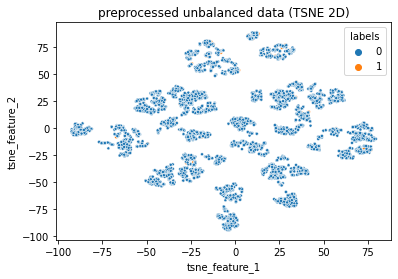

In [13]:
## unbalanced TSNE 2D plot:

plot1 = sns.scatterplot(data=dfUnbTsne2D, x="tsne_feature_1", y="tsne_feature_2", hue="labels",marker = '.')
plot1.set(title = "preprocessed unbalanced data (TSNE 2D)")

[Text(0.5, 1.0, 'balanced data (TSNE 2D)')]

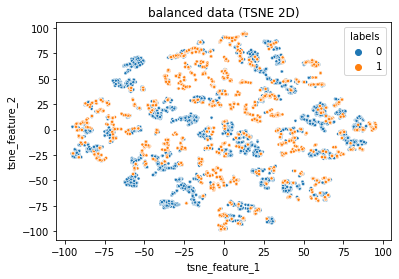

In [14]:
## balacned TSNE 2D plot:

plot2 = sns.scatterplot(data=dfBalTsne2D, x="tsne_feature_1", y="tsne_feature_2", hue="labels",marker = '.')
plot2.set(title = "balanced data (TSNE 2D)")

Text(0.5, 0, 'tsne_feature_3')

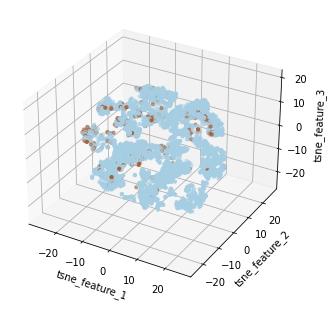

In [15]:
## unbalanced 3D plot (TSNE)

fig = plt.figure()
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

sc = ax.scatter(unbTsne3D[:,0], unbTsne3D[:,1], unbTsne3D[:,2], s=40, c=processed.iloc[:,-1], marker='.', cmap='Paired')
ax.set_xlabel('tsne_feature_1')
ax.set_ylabel('tsne_feature_2')
ax.set_zlabel('tsne_feature_3')


Text(0.5, 0, 'tsne_feature_3')

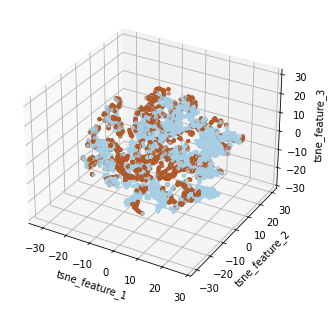

In [16]:
## balanced 3D plot (TSNE)

fig = plt.figure()
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

sc = ax.scatter(balTsne3D[:,0], balTsne3D[:,1], balTsne3D[:,2], s=40, c=balanced.iloc[:,-1], marker='.', cmap='Paired')
ax.set_xlabel('tsne_feature_1')
ax.set_ylabel('tsne_feature_2')
ax.set_zlabel('tsne_feature_3')


In [17]:
## PCA to reduced dimension to either 2D or 3D

pca2D = PCA(n_components=2)
pca3D = PCA(n_components=3)

unbPca2D  = pca2D.fit_transform(processed)
unbPca3D  = pca3D.fit_transform(processed)

balPca2D  = pca2D.fit_transform(unbNorm)
balPca3D  = pca3D.fit_transform(balNorm)

dfUnbPca2D = pd.DataFrame(unbPca2D, columns=["PCA_feature_1", "PCA_feature_2"])
dfUnbPca2D["labels"] = processed.iloc[:,-1]

dfBalPca2D = pd.DataFrame(balPca2D, columns=["PCA_feature_1", "PCA_feature_2"])
dfBalPca2D["labels"] = balanced.iloc[:,-1]

dfUnbPca3D = pd.DataFrame(unbPca3D, columns=["PCA_feature_1", "PCA_feature_2", "PCA_feature_3"])
dfUnbPca3D["labels"] = processed.iloc[:,-1]

dfBalPca3D = pd.DataFrame(balPca3D, columns=["PCA_feature_1", "PCA_feature_2", "PCA_feature_3"])
dfBalPca3D["labels"] = balanced.iloc[:,-1]


print ("done !")

done !


[Text(0.5, 1.0, 'preprocessed unbalanced data (PCA 2D)')]

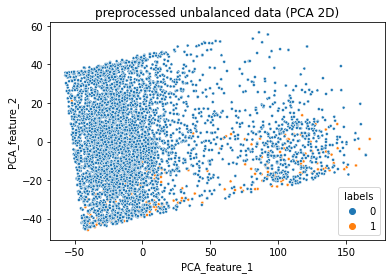

In [18]:
## unbalanced PCA 2D plot:

plot = sns.scatterplot(data=dfUnbPca2D, x="PCA_feature_1", y="PCA_feature_2", hue="labels",marker = '.')
plot.set(title = "preprocessed unbalanced data (PCA 2D)")

[Text(0.5, 1.0, 'balanced data (PCA 2D)')]

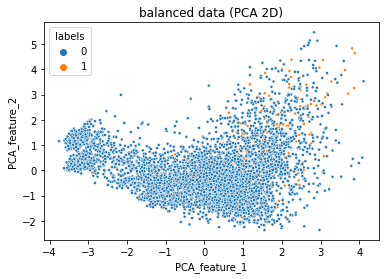

In [19]:
## balacned TSNE 2D plot:

plot = sns.scatterplot(data=dfBalPca2D, x="PCA_feature_1", y="PCA_feature_2", hue="labels",marker = '.')
plot.set(title = "balanced data (PCA 2D)")

Text(0.5, 0, 'PCA_feature_3')

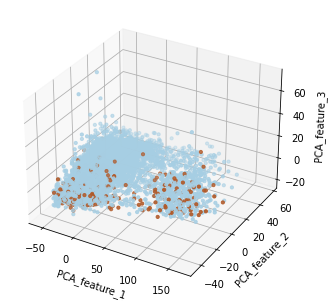

In [20]:
## unbalanced 3D plot (PCA)

fig = plt.figure()
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

sc = ax.scatter(unbPca3D[:,0], unbPca3D[:,1], unbPca3D[:,2], s=40, c=processed.iloc[:,-1], marker='.', cmap='Paired')
ax.set_xlabel('PCA_feature_1')
ax.set_ylabel('PCA_feature_2')
ax.set_zlabel('PCA_feature_3')


Text(0.5, 0, 'PCA_feature_3')

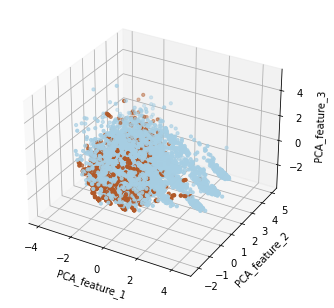

In [21]:
## balanced 3D plot (PCA)

fig = plt.figure()
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

sc = ax.scatter(balPca3D[:,0], balPca3D[:,1], balPca3D[:,2], s=40, c=balanced.iloc[:,-1], marker='.', cmap='Paired')
ax.set_xlabel('PCA_feature_1')
ax.set_ylabel('PCA_feature_2')
ax.set_zlabel('PCA_feature_3')

In [68]:
8## Here are a summary of all the preporcessed data:

print ("raw data:")
print (rawData)
print ("=================================================== \n")
print ("unbalanced data (with label encoder, fill in missing data, and droped patient id):")
print (processed)
print ("=================================================== \n")
print ("balanced data:")
print (balanced)
print ("=================================================== \n")
print ("2D TSNE unbalanced data:")
print (dfUnbTsne2D)
print ("=================================================== \n")
print ("3D TSNE unbalanced data:")
print (dfUnbTsne3D)
print ("=================================================== \n")
print ("2D TSNE balanced data:")
print (dfBalTsne2D)
print ("=================================================== \n")
print ("3D TSNE balanced data:")
print (dfBalTsne3D)
print ("=================================================== \n")
print ("2D PCA unbalanced data:")
print (dfUnbPca2D)
print ("=================================================== \n")
print ("3D PCA unbalanced data:")
print (dfUnbPca3D)
print ("=================================================== \n")
print ("2D PCA balanced data:")
print (dfBalPca2D)
print ("=================================================== \n")
print ("3D PCA balanced data:")
print (dfBalPca3D)
print ("=================================================== \n")

raw data:
         id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36

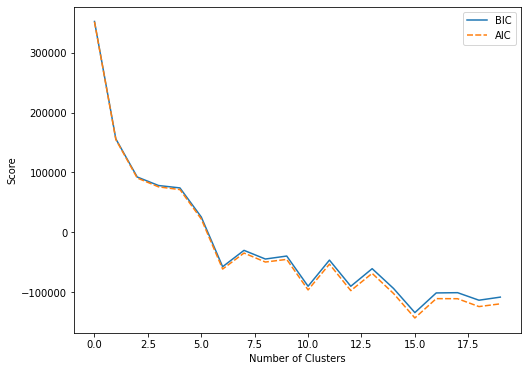

In [23]:

from sklearn.mixture import GaussianMixture

data = pd.DataFrame(balanced)
#Find the optimal number of clusters
n_components = np.arange(1, 21)
models = [GaussianMixture(n,covariance_type='full', random_state=0).fit(data) for n in n_components]
gmm_model_comparisons=pd.DataFrame({"n_components" : n_components,
                                  "BIC" : [m.bic(data) for m in models],
                                   "AIC" : [m.aic(data) for m in models]})
gmm_model_comparisons.head()
plt.figure(figsize=(8,6))
sns.lineplot(data=gmm_model_comparisons[["BIC","AIC"]])
plt.xlabel("Number of Clusters")
plt.ylabel("Score")

gmm=GaussianMixture(n_components=5,covariance_type='diag',max_iter=5000,n_init=5000,random_state=0).fit(data)
labels = gmm.predict(data)
data['cluster'] = labels

optimal_clusters = 5

In [24]:
SIGMA_CONST = 1e-6
LOG_CONST = 1e-32


class GMM(object):
    def __init__(self, X, K, max_iters = 100): 
        """
        Args: 
            X: the observations/datapoints, N x D numpy array
            K: number of clusters/components
            max_iters: maximum number of iterations (used in EM implementation)
        """

        self.points = X
        self.max_iters = max_iters
        
        self.N = self.points.shape[0]        #number of observations
        self.D = self.points.shape[1]        #number of features
        self.K = K                           #number of components/clusters

    
    def softmax(self, logit): 
        """
        Args:
            logit: N x D numpy array
        Return:
            prob: N x D numpy array. See the above function.
        """
        N, D = np.shape(logit)
        maximums = np.amax(logit,axis = 1)
        logit = np.exp(logit - maximums.reshape(N,1))
        sums = np.sum(logit, axis = 1, keepdims = True)
        prob = np.true_divide(logit, sums)
        return prob
        raise NotImplementedError


    def logsumexp(self, logit): 
        """
        Args:
            logit: N x D numpy array
        Return:
            s: N x 1 array where s[i,0] = logsumexp(logit[i,:]). See the above function
        """
        N, D = np.shape(logit)
        maximums = np.amax(logit,axis = 1)
        logit = np.exp(logit - maximums.reshape(N,1)) 
        s = np.sum(logit, axis = 1, keepdims = True)
        s = np.log(s) + maximums.reshape(N,1)
        return s
        raise NotImplementedError


    def multinormalPDF(self, logits, mu_i, sigma_i):  
        """
        Args: 
            logits: N x D numpy array
            mu_i: 1xD numpy array, the center for the ith gaussian.
            sigma_i: 1xDxD numpy array, the covariance matrix of the ith gaussian.  
        Return:
            normal_pdf: 1xN numpy array, the probability distribution of N data for the ith gaussian
            
        Hint: 
            np.linalg.det() and np.linalg.inv() should be handy.
        """
        N, D = np.shape(logits)
        if len(np.shape(sigma_i)) == 2:
            sigma_i = np.diagonal(sigma_i)
        else:
            sigma_i = np.diagonal(sigma_i[0])
        pdf = np.ones((1, N))
        for i in range(D):
            exponent = ((-2 * sigma_i[i])**-1) * np.square(logits[:, i] - mu_i[i])
            pdf *= ((2 * np.pi * sigma_i[i])**-0.5) * np.exp(exponent)
        return np.reshape(pdf, (N,))
        raise NotImplementedError
    
    
    def _init_components(self, **kwargs): 
        """
        Args:
            kwargs: any other arguments you want
        Return:
            pi: numpy array of length K, prior
            mu: KxD numpy array, the center for each gaussian. 
            sigma: KxDxD numpy array, the diagonal standard deviation of each gaussian. 
                You will have KxDxD numpy array for full covariance matrix case
        """
        pi = np.zeros(self.K) + 1/self.K
        mu = self.points[0:self.K]
        self.D = self.points.shape[1]
        sigma = np.zeros((self.K, self.D, self.D))
        for k in range (self.K):
            sigma[k] = np.eye(self.D)
        return pi, mu, sigma
        raise NotImplementedError

    
    def _ll_joint(self, pi, mu, sigma, **kwargs): 
        """
        Args:
            pi: np array of length K, the prior of each component
            mu: KxD numpy array, the center for each gaussian. 
            sigma: KxDxD numpy array, the diagonal standard deviation of each gaussian. You will have KxDxD numpy
            array for full covariance matrix case
            
        Return:
            ll(log-likelihood): NxK array, where ll(i, k) = log pi(k) + log NormalPDF(points_i | mu[k], sigma[k])
        """
        N, D = np.shape(self.points)
        K = np.shape(pi)[0]
        ll = np.zeros((N, K))
        for k in range(K):
            temp = np.matmul((self.points - mu[k]), np.linalg.pinv(sigma[k]))
            ll[:,k] = -0.5 * np.einsum('ij,ij->i', temp, (self.points - mu[k]))
            ll[:,k] += np.log( pi[k] / ((2*np.pi)**(D/2)*np.sqrt(np.linalg.det(sigma[k]) + 1e-18)))
        return ll
        raise NotImplementedError


    def _E_step(self, pi, mu, sigma, **kwargs): 
        """
        Args:
            pi: np array of length K, the prior of each component
            mu: KxD numpy array, the center for each gaussian. 
            sigma: KxDxD numpy array, the diagonal standard deviation of each gaussian.You will have KxDxD numpy
            array for full covariance matrix case
        Return:
            gamma(tau): NxK array, the posterior distribution (a.k.a, the soft cluster assignment) for each observation.
            
        Hint: 
            You should be able to do this with just a few lines of code by using _ll_joint() and softmax() defined above. 
        """

        ll = self._ll_joint(pi, mu ,sigma)
        gamma = self.softmax(ll)
        return gamma
        raise NotImplementedError

    def _M_step(self, gamma, **kwargs): 
        """
        Args:
            gamma(tau): NxK array, the posterior distribution (a.k.a, the soft cluster assignment) for each observation.
        Return:
            pi: np array of length K, the prior of each component
            mu: KxD numpy array, the center for each gaussian. 
            sigma: KxDxD numpy array, the diagonal standard deviation of each gaussian. You will have KxDxD numpy
            array for full covariance matrix case
            
        Hint:  
            There are formulas in the slide and in the above description box.
        """
        N, D = np.shape(self.points)
        K = np.shape(gamma)[1]
        N_k = np.sum(gamma, axis=0)
        pi = N_k / N
        mu = (np.matmul(gamma.T, self.points).T / N_k).T
        sigma = np.zeros((K, D, D))
        for k in range(K):
            temp = np.matmul((self.points - mu[k]).reshape((N, D, 1)), (self.points - mu[k]).reshape((N, 1, D)))
            sigma[k] = np.dot(np.transpose(temp, (1, 2, 0)), gamma[:,k])
            sigma[k] /= N_k[k]
        return pi, mu, sigma
        raise NotImplementedError
    
    
    def __call__(self, abs_tol=1e-16, rel_tol=1e-16, **kwargs): 
        """
        Args:
            abs_tol: convergence criteria w.r.t absolute change of loss
            rel_tol: convergence criteria w.r.t relative change of loss
            kwargs: any additional arguments you want
        
        Return:
            gamma(tau): NxK array, the posterior distribution (a.k.a, the soft cluster assignment) for each observation.
            (pi, mu, sigma): (1xK np array, KxD numpy array, KxDxD numpy array)       
        
        Hint: 
            You do not need to change it. For each iteration, we process E and M steps, then update the paramters. 
        """
        pi, mu, sigma = self._init_components(**kwargs)
        pbar = tqdm(range(self.max_iters))
        
        for it in pbar:
            # E-step
            gamma = self._E_step(pi, mu, sigma)
            
            # M-step
            pi, mu, sigma = self._M_step(gamma)
            
            # calculate the negative log-likelihood of observation
            joint_ll = self._ll_joint(pi, mu, sigma)
            loss = -np.sum(self.logsumexp(joint_ll))
            if it:
                diff = np.abs(prev_loss - loss)
                if diff < abs_tol and diff / prev_loss < rel_tol:
                    break
            prev_loss = loss
            pbar.set_description('iter %d, loss: %.4f' % (it, loss))
        return gamma, (pi, mu, sigma)
    

In [25]:
#reshape the dataset
processed_np = processed.iloc[:,0:10].to_numpy()
balanced_np = balanced.iloc[:,0:10].to_numpy()
dfUnbTsne2D_np = dfUnbTsne2D.iloc[:,0:2].to_numpy()
dfUnbTsne3D_np = dfUnbTsne3D.iloc[:,0:3].to_numpy()
dfBalTsne2D_np = dfBalTsne2D.iloc[:,0:2].to_numpy()
dfBalTsne3D_np = dfBalTsne3D.iloc[:,0:3].to_numpy()
dfUnbPca2D_np = dfUnbPca2D.iloc[:,0:2].to_numpy()
dfUnbPca3D_np = dfUnbPca3D.iloc[:,0:3].to_numpy()
dfBalPca2D_np = dfBalPca2D.iloc[:,0:2].to_numpy()
dfBalPca3D_np = dfBalPca3D.iloc[:,0:3].to_numpy()

In [26]:
# Visualize the dataset
def plot_data(data, plot_name):
    
    
    data0 = data[data[:, 2] == 0][:, :2]
    data1 = data[data[:, 2] == 1][:, :2]
    data2 = data[data[:, 2] == 2][:, :2]
    data3 = data[data[:, 2] == 3][:, :2]
    data4 = data[data[:, 2] == 4][:, :2]
    
    plt.scatter(data0[:, 0], data0[:, 1], c='lightcoral', label="Cluster 1")
    plt.scatter(data1[:, 0], data1[:, 1], c='darkkhaki', label="Cluster 2")
    plt.scatter(data2[:, 0], data2[:, 1], c='darkseagreen', label="Cluster 3")
    plt.scatter(data3[:, 0], data3[:, 1], c='orchid', label="Cluster 4")
    plt.scatter(data4[:, 0], data4[:, 1], c='yellow', label="Cluster 5")

    plt.legend()
    plt.title(plot_name)
    plt.show()
    plt.clf()

def plot_2Ddata7(data, plot_name):
    
    # Visualize the dataset
    
    data0 = data[data[:, 2] == 0][:, :2]
    data1 = data[data[:, 2] == 1][:, :2]
    data2 = data[data[:, 2] == 2][:, :2]
    data3 = data[data[:, 2] == 3][:, :2]
    data4 = data[data[:, 2] == 4][:, :2]
    data5 = data[data[:, 2] == 5][:, :2]
    data6 = data[data[:, 2] == 6][:, :2]
    
    plt.scatter(data0[:, 0], data0[:, 1], c='lightcoral', label="Cluster 1")
    plt.scatter(data1[:, 0], data1[:, 1], c='darkkhaki', label="Cluster 2")
    plt.scatter(data2[:, 0], data2[:, 1], c='darkseagreen', label="Cluster 3")
    plt.scatter(data3[:, 0], data3[:, 1], c='orchid', label="Cluster 4")
    plt.scatter(data4[:, 0], data4[:, 1], c='yellow', label="Cluster 5")
    plt.scatter(data5[:, 0], data5[:, 1], c='blue', label="Cluster 6")
    plt.scatter(data6[:, 0], data6[:, 1], c='orange', label="Cluster 7")          
    

    plt.legend()
    plt.title(plot_name)
    plt.show()
    plt.clf()

def plot_3Ddata(data,plot_name):
    
    data0 = data[data[:, 3] == 0][:, :3]
    data1 = data[data[:, 3] == 1][:, :3]
    data2 = data[data[:, 3] == 2][:, :3]
    data3 = data[data[:, 3] == 3][:, :3]
    data4 = data[data[:, 3] == 4][:, :3]
    
    fig = plt.figure(figsize = (10, 7))
    ax = plt.axes(projection ="3d")
    
    ax.scatter3D(data0[:, 0], data0[:, 1],data0[:, 2], c='lightcoral', label="Cluster 1")
    ax.scatter3D(data1[:, 0], data1[:, 1],data1[:, 2], c='darkkhaki', label="Cluster 2")
    ax.scatter3D(data2[:, 0], data2[:, 1],data2[:, 2], c='darkseagreen', label="Cluster 3")
    ax.scatter3D(data3[:, 0], data3[:, 1],data3[:, 2], c='orchid', label="Cluster 4")
    ax.scatter3D(data4[:, 0], data4[:, 1],data4[:, 2], c='yellow', label="Cluster 5")
    
    plt.legend()
    plt.title(plot_name)
    plt.show()
    plt.clf()

def plot_3Ddata7(data,plot_name):
    
    data0 = data[data[:, 3] == 0][:, :3]
    data1 = data[data[:, 3] == 1][:, :3]
    data2 = data[data[:, 3] == 2][:, :3]
    data3 = data[data[:, 3] == 3][:, :3]
    data4 = data[data[:, 3] == 4][:, :3]
    data5 = data[data[:, 3] == 5][:, :3]
    data6 = data[data[:, 3] == 6][:, :3]
    
    fig = plt.figure(figsize = (10, 7))
    ax = plt.axes(projection ="3d")
    
    ax.scatter3D(data0[:, 0], data0[:, 1],data0[:, 2], c='lightcoral', label="Cluster 1")
    ax.scatter3D(data1[:, 0], data1[:, 1],data1[:, 2], c='darkkhaki', label="Cluster 2")
    ax.scatter3D(data2[:, 0], data2[:, 1],data2[:, 2], c='darkseagreen', label="Cluster 3")
    ax.scatter3D(data3[:, 0], data3[:, 1],data3[:, 2], c='orchid', label="Cluster 4")
    ax.scatter3D(data4[:, 0], data4[:, 1],data4[:, 2], c='yellow', label="Cluster 5")
    ax.scatter3D(data5[:, 0], data5[:, 1],data5[:, 2], c='blue', label="Cluster 6")
    ax.scatter3D(data6[:, 0], data6[:, 1],data6[:, 2], c='orange', label="Cluster 7")
    
    plt.legend()
    plt.title(plot_name)
    plt.show()
    plt.clf()

iter 9, loss: 51144.1508: 100%|██████████| 10/10 [00:00<00:00, 117.20it/s]


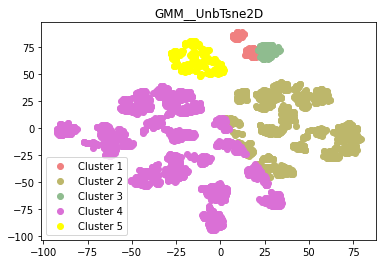

iter 9, loss: 100438.8106: 100%|██████████| 10/10 [00:00<00:00, 90.06it/s]


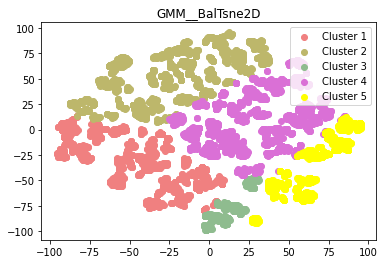

iter 9, loss: 47600.8107: 100%|██████████| 10/10 [00:00<00:00, 186.79it/s]


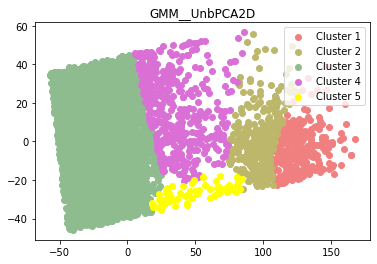

iter 9, loss: 15620.8386: 100%|██████████| 10/10 [00:00<00:00, 189.75it/s]


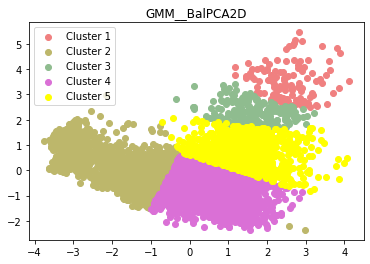

<Figure size 432x288 with 0 Axes>

In [27]:
# Unbalanced 2DTSNE data GMM
gamma, (pi, mu, sigma) = GMM(dfUnbTsne2D_np, K=optimal_clusters, max_iters=10)()
cluster_ids = np.argmax(gamma, axis=1)
centers = mu
cluster_ids = cluster_ids.reshape((5110,1))
data_gmm_iteration = np.concatenate((dfUnbTsne2D_np, cluster_ids), axis=1)
plot_data(data_gmm_iteration,"GMM__UnbTsne2D")

# Balanced 2DTSNE data
gamma, (pi, mu, sigma) = GMM(dfBalTsne2D_np[:,:2], K=optimal_clusters, max_iters=10)()
cluster_ids = np.argmax(gamma, axis=1)
centers = mu
cluster_ids = cluster_ids.reshape((9722,1))
data_gmm_iteration = np.concatenate((dfBalTsne2D_np[:,:2], cluster_ids), axis=1)
plot_data(data_gmm_iteration,"GMM__BalTsne2D")

# Unbalanced 2DPCA data GMM
gamma, (pi, mu, sigma) = GMM(dfUnbPca2D_np[:,:2], K=optimal_clusters, max_iters=10)()
cluster_ids = np.argmax(gamma, axis=1)
centers = mu
cluster_ids = cluster_ids.reshape((5110,1))
data_gmm_iteration = np.concatenate((dfUnbPca2D_np[:,:2], cluster_ids), axis=1)
plot_data(data_gmm_iteration,"GMM__UnbPCA2D")

# Balanced 2DPCA data GMM
gamma, (pi, mu, sigma) = GMM(dfBalPca2D_np[:,:2], K=optimal_clusters, max_iters=10)()
cluster_ids = np.argmax(gamma, axis=1)
centers = mu
cluster_ids = cluster_ids.reshape((5110,1))
data_gmm_iteration = np.concatenate((dfBalPca2D_np[:,:2], cluster_ids), axis=1)
plot_data(data_gmm_iteration,"GMM__BalPCA2D")

iter 9, loss: 51144.1508: 100%|██████████| 10/10 [00:00<00:00, 120.56it/s]


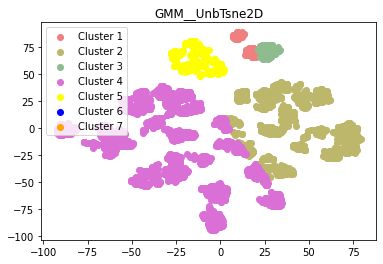

iter 9, loss: 100438.8106: 100%|██████████| 10/10 [00:00<00:00, 90.70it/s]


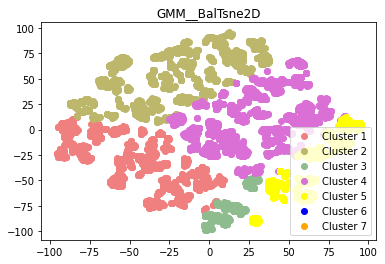

iter 9, loss: 47600.8107: 100%|██████████| 10/10 [00:00<00:00, 174.67it/s]


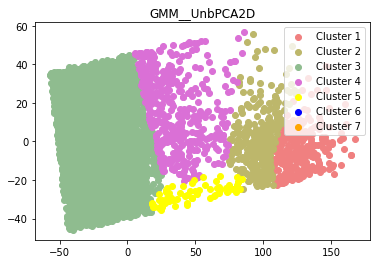

iter 9, loss: 15620.8386: 100%|██████████| 10/10 [00:00<00:00, 189.29it/s]


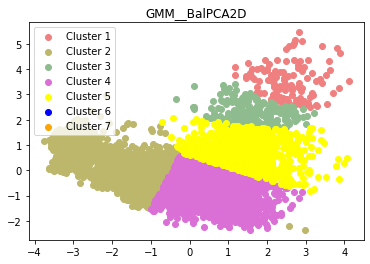

<Figure size 432x288 with 0 Axes>

In [28]:
optimal_cluster=7
# Unbalanced 2DTSNE data GMM
gamma, (pi, mu, sigma) = GMM(dfUnbTsne2D_np, K=optimal_clusters, max_iters=10)()
cluster_ids = np.argmax(gamma, axis=1)
centers = mu
cluster_ids = cluster_ids.reshape((5110,1))
data_gmm_iteration = np.concatenate((dfUnbTsne2D_np, cluster_ids), axis=1)
plot_2Ddata7(data_gmm_iteration,"GMM__UnbTsne2D")

# Balanced 2DTSNE data
gamma, (pi, mu, sigma) = GMM(dfBalTsne2D_np[:,:2], K=optimal_clusters, max_iters=10)()
cluster_ids = np.argmax(gamma, axis=1)
centers = mu
cluster_ids = cluster_ids.reshape((9722,1))
data_gmm_iteration = np.concatenate((dfBalTsne2D_np[:,:2], cluster_ids), axis=1)
plot_2Ddata7(data_gmm_iteration,"GMM__BalTsne2D")

# Unbalanced 2DPCA data GMM
gamma, (pi, mu, sigma) = GMM(dfUnbPca2D_np[:,:2], K=optimal_clusters, max_iters=10)()
cluster_ids = np.argmax(gamma, axis=1)
centers = mu
cluster_ids = cluster_ids.reshape((5110,1))
data_gmm_iteration = np.concatenate((dfUnbPca2D_np[:,:2], cluster_ids), axis=1)
plot_2Ddata7(data_gmm_iteration,"GMM__UnbPCA2D")

# Balanced 2DPCA data GMM
gamma, (pi, mu, sigma) = GMM(dfBalPca2D_np[:,:2], K=optimal_clusters, max_iters=10)()
cluster_ids = np.argmax(gamma, axis=1)
centers = mu
cluster_ids = cluster_ids.reshape((5110,1))
data_gmm_iteration = np.concatenate((dfBalPca2D_np[:,:2], cluster_ids), axis=1)
plot_2Ddata7(data_gmm_iteration,"GMM__BalPCA2D")


iter 9, loss: 56006.9509: 100%|██████████| 10/10 [00:00<00:00, 82.91it/s]


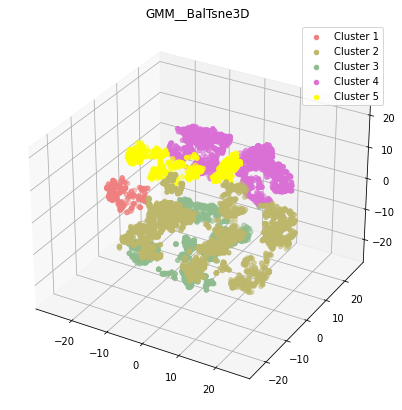

iter 9, loss: 112938.9328: 100%|██████████| 10/10 [00:00<00:00, 73.26it/s]


<Figure size 432x288 with 0 Axes>

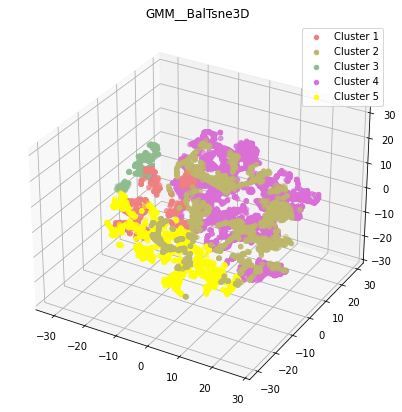

iter 9, loss: 64423.9807: 100%|██████████| 10/10 [00:00<00:00, 156.24it/s]


<Figure size 432x288 with 0 Axes>

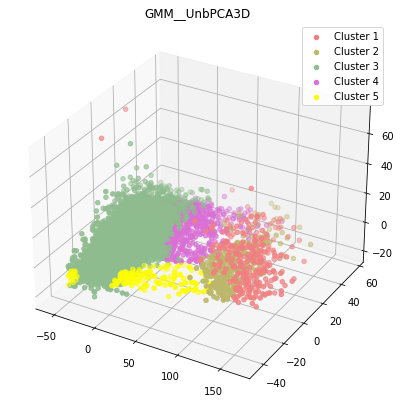

iter 9, loss: 43147.8090: 100%|██████████| 10/10 [00:00<00:00, 112.18it/s]


<Figure size 432x288 with 0 Axes>

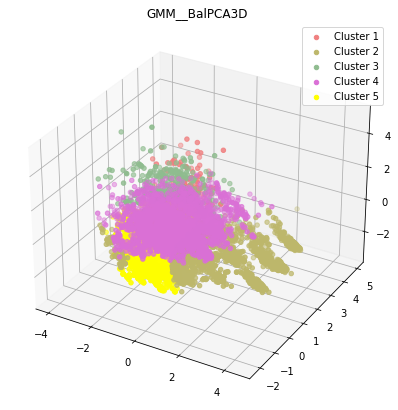

<Figure size 432x288 with 0 Axes>

In [29]:
# Unbalanced 3DTSNE data GMM
gamma, (pi, mu, sigma) = GMM(dfUnbTsne3D_np, K=optimal_clusters, max_iters=10)()
cluster_ids = np.argmax(gamma, axis=1)
centers = mu
cluster_ids = cluster_ids.reshape((5110,1))
data_gmm_iteration = np.concatenate((dfUnbTsne3D_np, cluster_ids), axis=1)
plot_3Ddata(data_gmm_iteration,"GMM__BalTsne3D")

# Balanced 3DTSNE data GMM
gamma, (pi, mu, sigma) = GMM(dfBalTsne3D_np, K=optimal_clusters, max_iters=10)()
cluster_ids = np.argmax(gamma, axis=1)
centers = mu
cluster_ids = cluster_ids.reshape((9722,1))
data_gmm_iteration = np.concatenate((dfBalTsne3D_np, cluster_ids), axis=1)
plot_3Ddata(data_gmm_iteration,"GMM__BalTsne3D")

# Unbalanced 3DPCA data GMM
gamma, (pi, mu, sigma) = GMM(dfUnbPca3D_np, K=optimal_clusters, max_iters=10)()
cluster_ids = np.argmax(gamma, axis=1)
centers = mu
cluster_ids = cluster_ids.reshape((5110,1))
data_gmm_iteration = np.concatenate((dfUnbPca3D_np, cluster_ids), axis=1)
plot_3Ddata(data_gmm_iteration,"GMM__UnbPCA3D")

# Balanced 3DPCA data GMM
gamma, (pi, mu, sigma) = GMM(dfBalPca3D_np, K=optimal_clusters, max_iters=10)()
cluster_ids = np.argmax(gamma, axis=1)
centers = mu
cluster_ids = cluster_ids.reshape((9722,1))
data_gmm_iteration = np.concatenate((dfBalPca3D_np, cluster_ids), axis=1)
plot_3Ddata(data_gmm_iteration,"GMM__BalPCA3D")

In [30]:
gamma, (pi, mu, sigma) = GMM(balanced_np, K=optimal_clusters, max_iters=10)()
cluster_ids = np.argmax(gamma, axis=1)
centers = mu
cluster_ids = cluster_ids.reshape((9722,1))
np.savetxt('balancedGMM.txt',cluster_ids,delimiter=',')

iter 9, loss: 98482.8704: 100%|██████████| 10/10 [00:00<00:00, 27.82it/s]


In [31]:
# balanced
#Silhouette Coefficient in GMM
from sklearn.metrics import silhouette_score
import numpy as np
from sklearn.mixture import GaussianMixture

# 5 clusters
#SC for balanced TSNE 2D
dataset1 = dfBalTsne2D_np
gmm_model = GaussianMixture(5, random_state = 1).fit(dataset1)
labels1 = gmm_model.fit_predict(dataset1)
print(silhouette_score(dataset1, labels1, metric = 'euclidean'))

#SC for balanced TSNE 3D in 5 clusters
dataset2 = dfBalPca3D_np
gmm_model = GaussianMixture(5, random_state = 1).fit(dataset2)
labels2 = gmm_model.fit_predict(dataset2)
print(silhouette_score(dataset2, labels2, metric = 'euclidean'))

#SC for balanced PCA 2D in 5 clusters
dataset3 = dfBalPca2D_np
gmm_model = GaussianMixture(5, random_state = 1).fit(dataset3)
labels3 = gmm_model.fit_predict(dataset3)
print(silhouette_score(dataset3, labels3, metric = 'euclidean'))

#SC for balanced PCA 3D in 5 clusters
dataset4 = dfBalPca3D_np
gmm_model = GaussianMixture(5, random_state = 1).fit(dataset4)
labels4 = gmm_model.fit_predict(dataset4)
print(silhouette_score(dataset4, labels4, metric = 'euclidean'))

#SC for balanced TSNE 2D in 7 clusters
dataset = dfBalTsne2D_np
gmm_model = GaussianMixture(7, random_state = 1).fit(dataset)
labels = gmm_model.fit_predict(dataset)
print(silhouette_score(dataset, labels, metric = 'euclidean'))

#SC for balanced TSNE 3D in 7 clusters
dataset = dfBalTsne3D_np
gmm_model = GaussianMixture(7, random_state = 1).fit(dataset)
labels = gmm_model.fit_predict(dataset)
print(silhouette_score(dataset, labels, metric = 'euclidean'))

#SC for balanced PCA 2D in 7 clusters
dataset = dfBalPca2D_np
gmm_model = GaussianMixture(7, random_state = 1).fit(dataset)
labels = gmm_model.fit_predict(dataset)
print(silhouette_score(dataset, labels, metric = 'euclidean'))

#SC for balanced PCA 3D in 7 clusters
dataset = dfBalPca3D_np
gmm_model = GaussianMixture(7, random_state = 1).fit(dataset)
labels = gmm_model.fit_predict(dataset)
print(silhouette_score(dataset, labels, metric = 'euclidean'))

0.3696187
0.20165732918133722
0.35896037940841236
0.20165732918133722
0.37444794
0.2574179
0.3405601389188869
0.24130921545319148


In [32]:
#balanced
from sklearn.metrics import davies_bouldin_score
#DS for TSNE 2D in 5 clusters
data = dfBalTsne2D_np
gmm_model = GaussianMixture(5, random_state = 1).fit(data)
labels = gmm_model.fit_predict(data)
print(davies_bouldin_score(data,labels))

#DS for TSNE 3D in 5 clusters
data = dfBalTsne3D_np
gmm_model = GaussianMixture(5, random_state = 1).fit(data)
labels = gmm_model.fit_predict(data)
print(davies_bouldin_score(data,labels))

#DS for PCA 2D in 5 clusters
data = dfBalPca2D_np
gmm_model = GaussianMixture(5, random_state = 1).fit(data)
labels = gmm_model.fit_predict(data)
print(davies_bouldin_score(data,labels))

#DS for PCA 3D in 5 clusters
data = dfBalPca3D_np
gmm_model = GaussianMixture(5, random_state = 1).fit(data)
labels = gmm_model.fit_predict(data)
print(davies_bouldin_score(data,labels))

#DS for TSNE 2D in 7 clusters
data = dfBalTsne2D_np
gmm_model = GaussianMixture(7, random_state = 1).fit(data)
labels = gmm_model.fit_predict(data)
print(davies_bouldin_score(data,labels))

#DS for TSNE 3D in 7 clusters
data = dfBalTsne3D_np
gmm_model = GaussianMixture(7, random_state = 1).fit(data)
labels = gmm_model.fit_predict(data)
print(davies_bouldin_score(data,labels))

#DS for PCA 2D in 7 clusters
data = dfBalPca2D_np
gmm_model = GaussianMixture(7, random_state = 1).fit(data)
labels = gmm_model.fit_predict(data)
print(davies_bouldin_score(data,labels))

#DS for PCA 3D in 7 clusters
data = dfBalPca3D_np
gmm_model = GaussianMixture(7, random_state = 1).fit(data)
labels = gmm_model.fit_predict(data)
print(davies_bouldin_score(data,labels))

0.8346612849294932
1.1563557296555937
0.9388671531361862
1.3347757131222298
0.8022963956765821
1.1121504521761687
0.8763172665081554
1.120274739120187


In [33]:
# unbalanced
#Silhouette Coefficient in GMM

# 5 clusters
#SC for unbalanced TSNE 2D
dataset1 = dfUnbTsne2D_np
gmm_model = GaussianMixture(5, random_state = 1).fit(dataset1)
labels1 = gmm_model.fit_predict(dataset1)
print(silhouette_score(dataset1, labels1, metric = 'euclidean'))

#SC for balanced TSNE 3D in 5 clusters
dataset2 = dfUnbPca3D_np
gmm_model = GaussianMixture(5, random_state = 1).fit(dataset2)
labels2 = gmm_model.fit_predict(dataset2)
print(silhouette_score(dataset2, labels2, metric = 'euclidean'))

#SC for balanced PCA 2D in 5 clusters
dataset3 = dfBalPca2D_np
gmm_model = GaussianMixture(5, random_state = 1).fit(dataset3)
labels3 = gmm_model.fit_predict(dataset3)
print(silhouette_score(dataset3, labels3, metric = 'euclidean'))

#SC for balanced PCA 3D in 5 clusters
dataset4 = dfBalPca3D_np
gmm_model = GaussianMixture(5, random_state = 1).fit(dataset4)
labels4 = gmm_model.fit_predict(dataset4)
print(silhouette_score(dataset4, labels4, metric = 'euclidean'))

#SC for balanced TSNE 2D in 7 clusters
dataset = dfBalTsne2D_np
gmm_model = GaussianMixture(7, random_state = 1).fit(dataset)
labels = gmm_model.fit_predict(dataset)
print(silhouette_score(dataset, labels, metric = 'euclidean'))

#SC for balanced TSNE 3D in 7 clusters
dataset = dfBalTsne3D_np
gmm_model = GaussianMixture(7, random_state = 1).fit(dataset)
labels = gmm_model.fit_predict(dataset)
print(silhouette_score(dataset, labels, metric = 'euclidean'))

#SC for balanced PCA 2D in 7 clusters
dataset = dfBalPca2D_np
gmm_model = GaussianMixture(7, random_state = 1).fit(dataset)
labels = gmm_model.fit_predict(dataset)
print(silhouette_score(dataset, labels, metric = 'euclidean'))

#SC for balanced PCA 3D in 7 clusters
dataset = dfBalPca3D_np
gmm_model = GaussianMixture(7, random_state = 1).fit(dataset)
labels = gmm_model.fit_predict(dataset)
print(silhouette_score(dataset, labels, metric = 'euclidean'))

0.41742286
0.16998934800016297
0.35896037940841236
0.20165732918133722
0.37444794
0.2574179
0.3405601389188869
0.24130921545319148


In [34]:
from sklearn.manifold import Isomap

X = processed_np[:,1:]
embedding = Isomap(n_components=2)
X_transformed = embedding.fit_transform(X)

Y = balanced_np[:,1:]
embedding = Isomap(n_components=2)
Y_transformed = embedding.fit_transform(Y)

iter 9, loss: 51046.4568: 100%|██████████| 10/10 [00:00<00:00, 188.50it/s]


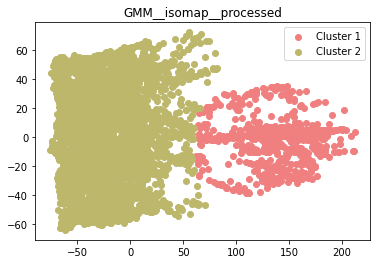

iter 9, loss: 98463.0974: 100%|██████████| 10/10 [00:00<00:00, 146.76it/s]


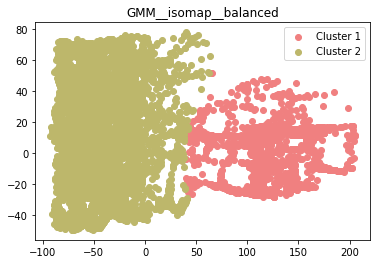

<Figure size 432x288 with 0 Axes>

In [42]:
def plot_data2(data, plot_name):
    
    
    data0 = data[data[:, 2] == 0][:, :2]
    data1 = data[data[:, 2] == 1][:, :2]
    
    plt.scatter(data0[:, 0], data0[:, 1], c='lightcoral', label="Cluster 1")
    plt.scatter(data1[:, 0], data1[:, 1], c='darkkhaki', label="Cluster 2")

    plt.legend()
    plt.title(plot_name)
    plt.show()
    plt.clf()
    
gamma, (pi, mu, sigma) = GMM(X_transformed, K=2, max_iters=10)()
cluster_ids = np.argmax(gamma, axis=1)
centers = mu
cluster_ids = cluster_ids.reshape((5110,1))
data_gmm_iteration = np.concatenate((X_transformed, cluster_ids), axis=1)
plot_data2(data_gmm_iteration,"GMM__isomap__processed")

gamma, (pi, mu, sigma) = GMM(Y_transformed, K=2, max_iters=10)()
cluster_ids = np.argmax(gamma, axis=1)
centers = mu
cluster_ids = cluster_ids.reshape((9722,1))
data_gmm_iteration = np.concatenate((Y_transformed, cluster_ids), axis=1)
plot_data2(data_gmm_iteration,"GMM__isomap__balanced")

In [90]:
import numpy as np
import sklearn
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

class RandomForest(object):
    def __init__(self, n_estimators=8, max_depth=5, feat_sample_rate=0.9):
        # helper function. You don't have to modify it
        # Initialization done here
        self.n_estimators = n_estimators    # number of trees in the forest
        self.max_depth = max_depth          # maximum depth a tree can take
        self.feat_sample_rate = feat_sample_rate    # feature sub sample rate
        self.bootstraps_row_indices = []    # subsampled row indices
        self.feature_indices = []           # indices of subsampled features
        self.out_of_bag = []
        self.decision_trees = [sklearn.tree.DecisionTreeClassifier(max_depth=max_depth, criterion='entropy') for i in range(n_estimators)]  # list containing sklearn decision trees objects
        
    def _bootstrapping(self, num_training, num_features): 
        """
        TODO: 
        - Randomly select a sample dataset of size num_training **with** replacement from the original dataset. 
        - Randomly select certain number of features (num_features denotes the total number of features in X, 
          feat_sample_rate denotes the percentage of features that are used to fit each decision tree) **without** replacement from the total number of features.
        
        Return:
        - row_idx: the row indices corresponding to the row locations of the selected samples in the original dataset.
        - col_idx: the column indices corresponding to the column locations of the selected features in the original feature list.
        
        Reference: https://en.wikipedia.org/wiki/Bootstrapping_(statistics)
        
        Hint: Consider using np.random.choice.
        """
        
        row_idx = np.random.randint(num_training, size = (num_training))
        col_idx = np.random.choice(np.array([i for i in range(num_features)]), size = (int)(num_features * self.feat_sample_rate), replace = False)
        return row_idx, col_idx
    
    def bootstrapping(self, num_training, num_features):
        # helper function. You don't have to modify it
        # Initializing the bootstap datasets for each tree
        for i in range(self.n_estimators):
            total = set(list(range(num_training)))
            row_idx, col_idx = self._bootstrapping(num_training, num_features)
            total = total - set(row_idx)
            self.bootstraps_row_indices.append(row_idx)
            self.feature_indices.append(col_idx)
            self.out_of_bag.append(total)

    def fit(self, X, y): 
        """
        TODO:
        Train decision trees using the bootstrapped datasets.
        Note that you need to use the row indices and column indices.
        
        X: NxD numpy array, where N is number 
           of instances and D is the dimensionality of each 
           instance
        y: Nx1 numpy array, the corresponding target labels

        Return:
            None. Calling this function should simply train the tree objects
            contained in self.decision_trees with your bootstrapped data.
        """
        self.bootstrapping(X.shape[0], X.shape[1])
        for i in range(self.n_estimators):
            row = self.bootstraps_row_indices[i]
            col = self.feature_indices[i]
            xtrain = X[row]
            xtrain = xtrain[:,col]
            ytrain = y[row]
            self.decision_trees[i].fit(xtrain, ytrain)

    def OOB_score(self, X, y):
        # helper function. You don't have to modify it
        # This function computes the accuracy of the random forest model predicting y given x.
        accuracy = []
        for i in range(len(X)):
            predictions = []
            for t in range(self.n_estimators):
                if i in self.out_of_bag[t]:
                    predictions.append(self.decision_trees[t].predict(np.reshape(X[i][self.feature_indices[t]], (1,-1)))[0])
            if len(predictions) > 0:
                accuracy.append(np.sum(predictions == y[i]) / float(len(predictions)))
        return np.mean(accuracy)


In [123]:
from sklearn import preprocessing
import pandas as pd
preprocessor = preprocessing.LabelEncoder()
from sklearn.model_selection import train_test_split
from sklearn import tree

X = balanced.iloc[:, :-1]
y = balanced.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

X_train = X_train.drop(columns = 'gender')
X_test = X_test.drop(columns = 'gender')
X_train, y_train, X_test, y_test = np.array(X_train), np.array(y_train), np.array(X_test), np.array(y_test)

n_estimators = 8
max_depth = 5
feat_sample_rate = 0.9

random_forest = RandomForest(n_estimators, max_depth, feat_sample_rate)
random_forest.fit(X_train, y_train)
accuracy=random_forest.OOB_score(X_test, y_test)
print("accuracy: %.4f" % accuracy)

tree.plot_tree(random_forest)

accuracy: 0.8096


NotFittedError: This RandomForest instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

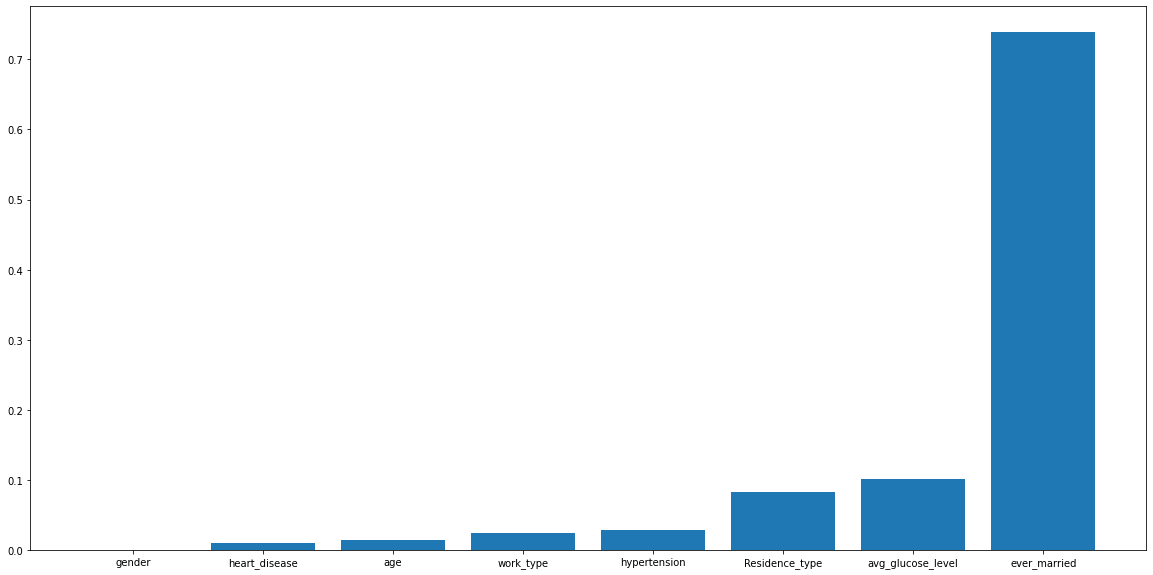

In [124]:
def plot_feature_importance(data_train):
    f = plt.figure()
    f.set_figwidth(20)
    f.set_figheight(10)
    data_train = data_train.drop(columns = 'stroke')
    importance = random_forest.decision_trees[1].feature_importances_
    indices = np.argsort(importance)
    
    plt.bar(data_train.columns[indices], importance[indices])
    plt.show()
    
plot_feature_importance(balanced)